In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)

In [2]:
import seaborn as sns
df=pd.read_csv("D:/JSW/validation/TI and Productivity.csv")

In [3]:
df.head()

,"Fe, %","FeO, %","SiO2, %","Al2O3, %","CaO, %","MnO, %","C, %","S, %","P, %",CaO/SiO2,Al2O3/SiO2,(CaO+MgO)/SiO2,"Cumu.+10mm,%","Mean size,mm","-100#, %",MPS (Raw mix) before moisture addition,LOI %,MOI%,Avg. machine speed,Avg. furnace temp.,WG fan speed (RPM),ESP inlet temp.,Avg. moisture at 2007 C,"Sinter M/C bed height,mm",Al2O3 (Iron ore fines),SiO2(Iron ore fines),WB16B temp.,Net Productivity,Coke particle (-3.15 mm),Cooler temp.deg C,"MgO, %",Limestone (-3.15 mm),Dolomite (-3.15 mm),"TI(+6.3mm), %","RDI(-3.15 mm), %","Productivity,t/m2/d"
0,54.58,9.00,5.49,3.96,10.87,0.18,0.02,0.01,0.05,1.98,0.72,2.37,66.66,17.35,37.28,2.79,3.21,4.71,2.18,1230.59,866.88,148.97,6.67,682.16,4.28,5.38,354.22,29.71,93.19,129.04,2.10,96.70,97.55,75.56,24.3,36.67
1,54.59,10.31,5.41,3.79,11.22,0.11,0.02,0.01,0.05,2.08,0.70,2.49,66.44,17.41,34.72,3.17,3.12,3.78,2.12,1228.04,889.32,138.66,6.44,678.33,4.13,5.37,317.92,30.55,96.82,167.71,2.20,97.91,97.08,76.23,28.2,37.62
2,55.10,9.57,5.14,4.12,10.30,0.19,0.02,0.01,0.05,2.00,0.80,2.43,66.44,17.55,31.54,3.83,3.26,3.97,2.01,1236.01,888.28,138.58,6.48,671.45,4.46,4.38,298.59,28.53,96.29,131.36,2.18,97.26,97.94,75.45,25.1,35.10
3,55.07,9.84,5.19,3.74,10.65,0.11,0.02,0.01,0.05,2.05,0.72,2.47,65.69,17.37,33.67,3.24,3.63,4.35,2.08,1231.97,890.00,142.25,6.59,670.79,4.34,4.05,304.53,28.75,95.27,143.89,2.19,97.66,97.52,76.18,NaN,35.71
4,53.56,10.15,5.83,4.78,11.19,0.12,0.02,0.01,0.05,1.92,0.82,2.30,65.85,17.81,35.79,3.25,3.34,4.14,2.23,1225.16,885.82,143.92,6.74,677.09,5.00,6.29,326.95,30.06,96.43,155.08,2.23,98.13,97.62,75.77,24.3,37.00


In [4]:
df.shape

(1410, 36)

In [5]:
df.isnull().sum()

Fe, %                                       0
FeO, %                                      0
SiO2, %                                     0
Al2O3, %                                    0
CaO, %                                      0
MnO, %                                      0
C, %                                        0
S, %                                        0
P, %                                        0
CaO/SiO2                                    0
Al2O3/SiO2                                  0
(CaO+MgO)/SiO2                              0
Cumu.+10mm,%                                0
Mean size,mm                                0
-100#, %                                    0
MPS (Raw mix) before moisture addition      0
LOI %                                       0
MOI%                                        0
Avg. machine speed                          0
Avg. furnace temp.                          0
WG fan speed (RPM)                          0
ESP inlet temp.                   

In [6]:
df.columns

Index(['Fe, %', 'FeO, %', 'SiO2, %', 'Al2O3, %', 'CaO, %', 'MnO, %', 'C, %',
       'S, %', 'P, %', 'CaO/SiO2', 'Al2O3/SiO2', '(CaO+MgO)/SiO2',
       'Cumu.+10mm,%', 'Mean size,mm', '-100#, %',
       'MPS (Raw mix) before moisture addition', 'LOI %', 'MOI%',
       'Avg. machine speed', 'Avg. furnace temp.', 'WG fan speed (RPM)',
       'ESP inlet temp.', 'Avg. moisture at 2007 C',
       'Sinter M/C bed height,mm', 'Al2O3 (Iron ore fines)',
       'SiO2(Iron ore fines)', 'WB16B temp.', 'Net Productivity',
       'Coke particle (-3.15 mm)', 'Cooler temp.deg C', 'MgO, %',
       'Limestone (-3.15 mm)', 'Dolomite (-3.15 mm)', 'TI(+6.3mm), %',
       'RDI(-3.15 mm), %', 'Productivity,t/m2/d'],
      dtype='object')

In [7]:
df.drop(['Mean size,mm','Net Productivity','RDI(-3.15 mm), %'],axis=1,inplace=True)

<AxesSubplot:>

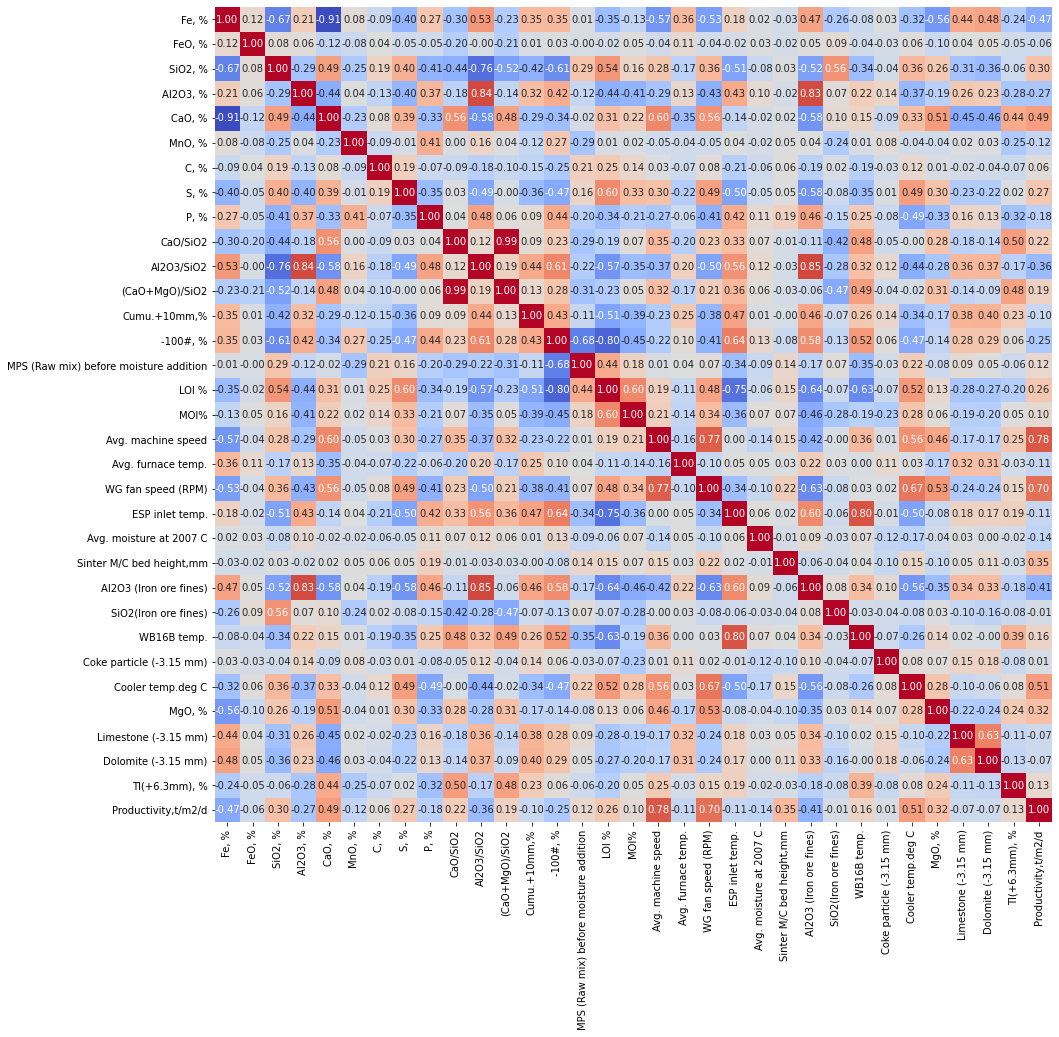

In [8]:
import seaborn as sns
fig, ax = plt.subplots(figsize=(15, 15))
sns.heatmap(df.corr(method='pearson'), annot=True, fmt='.2f', 
            cmap=plt.get_cmap('coolwarm'), cbar=False, ax=ax)

In [9]:
df.columns

Index(['Fe, %', 'FeO, %', 'SiO2, %', 'Al2O3, %', 'CaO, %', 'MnO, %', 'C, %',
       'S, %', 'P, %', 'CaO/SiO2', 'Al2O3/SiO2', '(CaO+MgO)/SiO2',
       'Cumu.+10mm,%', '-100#, %', 'MPS (Raw mix) before moisture addition',
       'LOI %', 'MOI%', 'Avg. machine speed', 'Avg. furnace temp.',
       'WG fan speed (RPM)', 'ESP inlet temp.', 'Avg. moisture at 2007 C',
       'Sinter M/C bed height,mm', 'Al2O3 (Iron ore fines)',
       'SiO2(Iron ore fines)', 'WB16B temp.', 'Coke particle (-3.15 mm)',
       'Cooler temp.deg C', 'MgO, %', 'Limestone (-3.15 mm)',
       'Dolomite (-3.15 mm)', 'TI(+6.3mm), %', 'Productivity,t/m2/d'],
      dtype='object')

In [10]:
from sklearn.metrics import r2_score
from sklearn.ensemble import ExtraTreesRegressor
log=[]
for i in range(0,40,1):
    X=df[['Fe, %', 'FeO, %', 'SiO2, %', 'Al2O3, %', 'CaO, %', 'MnO, %', 'C, %',
       'S, %', 'P, %', 'CaO/SiO2', 'Al2O3/SiO2', '(CaO+MgO)/SiO2', '-100#, %',
       'MPS (Raw mix) before moisture addition', 'LOI %', 'MOI%',
       'Avg. machine speed', 'Avg. furnace temp.', 'WG fan speed (RPM)',
       'ESP inlet temp.', 'Avg. moisture at 2007 C',
       'Sinter M/C bed height,mm', 'Al2O3 (Iron ore fines)',
       'SiO2(Iron ore fines)', 'WB16B temp.', 'Coke particle (-3.15 mm)',
       'Cooler temp.deg C', 'MgO, %', 'Limestone (-3.15 mm)',
       'Dolomite (-3.15 mm)']]
    y=df[['Productivity,t/m2/d']]
    X_train,X_test,y_train,y_test=train_test_split(X,y,shuffle=True,test_size=0.1,random_state=i)
    reg=ExtraTreesRegressor()
    reg.fit(X_train,y_train)
    y_pred=reg.predict(X_test)
    rr=r2_score(y_test,y_pred)
    print([rr,i])
    log.append(rr)

[0.8563675359538219, 0]
[0.8622926621274758, 1]
[0.8419768025890284, 2]
[0.8584859639612459, 3]
[0.8578939093852775, 4]
[0.8131764818836353, 5]
[0.8515643911904189, 6]
[0.741181562690185, 7]
[0.8862901433591389, 8]
[0.8410265125541208, 9]
[0.8861479459997892, 10]
[0.7414427501139678, 11]
[0.7670983672530027, 12]
[0.7948160614269971, 13]
[0.5358190182218953, 14]
[0.9078160393116541, 15]
[0.8445326917222747, 16]
[0.8333216565179782, 17]
[0.707218430656443, 18]
[0.9192801445373161, 19]
[0.8688353180849867, 20]
[0.8451926492759383, 21]
[0.872605030241878, 22]
[0.7993187689299848, 23]
[0.7865853384056627, 24]
[0.779781667998463, 25]
[0.8388748011459812, 26]
[0.8170456742399308, 27]
[0.8521155655257725, 28]
[0.8689172703275788, 29]
[0.8686283479276138, 30]
[0.739830341982471, 31]
[0.7919808859035734, 32]
[0.8358498678295527, 33]
[0.8510332367634453, 34]
[0.7971783236074297, 35]
[0.8758896430744456, 36]
[0.7867016693873481, 37]
[0.7861079380749528, 38]
[0.7369427027847131, 39]


In [11]:
sum(log)/len(log)

0.8186791028241849

In [12]:
max(log)

0.9192801445373161

In [13]:
X_train.columns

Index(['Fe, %', 'FeO, %', 'SiO2, %', 'Al2O3, %', 'CaO, %', 'MnO, %', 'C, %',
       'S, %', 'P, %', 'CaO/SiO2', 'Al2O3/SiO2', '(CaO+MgO)/SiO2', '-100#, %',
       'MPS (Raw mix) before moisture addition', 'LOI %', 'MOI%',
       'Avg. machine speed', 'Avg. furnace temp.', 'WG fan speed (RPM)',
       'ESP inlet temp.', 'Avg. moisture at 2007 C',
       'Sinter M/C bed height,mm', 'Al2O3 (Iron ore fines)',
       'SiO2(Iron ore fines)', 'WB16B temp.', 'Coke particle (-3.15 mm)',
       'Cooler temp.deg C', 'MgO, %', 'Limestone (-3.15 mm)',
       'Dolomite (-3.15 mm)'],
      dtype='object')

In [14]:
sum(log)/len(log)

0.8186791028241849

In [15]:
from sklearn.model_selection import cross_validate


Elapsed time to compute the importances: 0.000 seconds
Elapsed time to compute the importances: 20.157 seconds


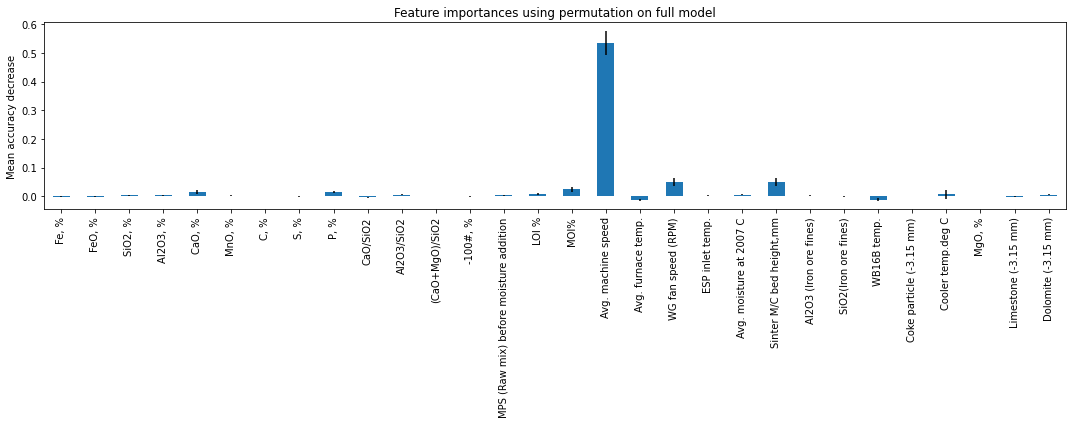

In [16]:
from sklearn.inspection import permutation_importance
import time
import numpy as np

start_time = time.time()

elapsed_time = time.time() - start_time
feature_names=X_train.columns
print(f"Elapsed time to compute the importances: {elapsed_time:.3f} seconds")

result = permutation_importance(
    reg, X_test, y_test, n_repeats=10, random_state=42, n_jobs=2
)
elapsed_time = time.time() - start_time
print(f"Elapsed time to compute the importances: {elapsed_time:.3f} seconds")

forest_importances = pd.Series(result.importances_mean, index=feature_names)

fig, ax = plt.subplots(figsize=(15,6))
forest_importances.plot.bar(yerr=result.importances_std, ax=ax)
ax.set_title("Feature importances using permutation on full model")
ax.set_ylabel("Mean accuracy decrease")
fig.tight_layout()
plt.show()

Elapsed time to compute the importances: 0.053 seconds


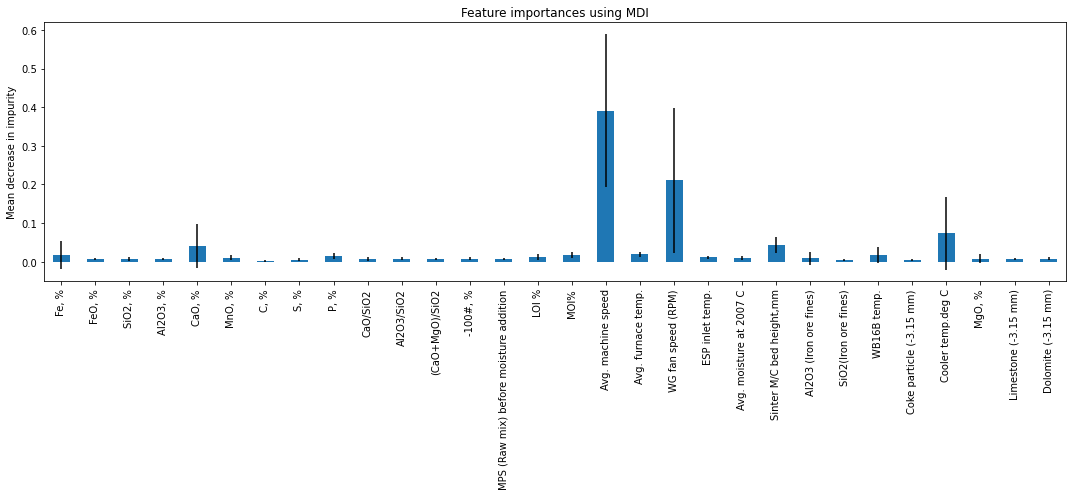

In [17]:
start_time = time.time()
importances = reg.feature_importances_
std = np.std([tree.feature_importances_ for tree in reg.estimators_], axis=0)
elapsed_time = time.time() - start_time

print(f"Elapsed time to compute the importances: {elapsed_time:.3f} seconds")
forest_importances = pd.Series(importances, index=feature_names)

fig, ax = plt.subplots(figsize=(15,7))
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

In [18]:
df.columns

Index(['Fe, %', 'FeO, %', 'SiO2, %', 'Al2O3, %', 'CaO, %', 'MnO, %', 'C, %',
       'S, %', 'P, %', 'CaO/SiO2', 'Al2O3/SiO2', '(CaO+MgO)/SiO2',
       'Cumu.+10mm,%', '-100#, %', 'MPS (Raw mix) before moisture addition',
       'LOI %', 'MOI%', 'Avg. machine speed', 'Avg. furnace temp.',
       'WG fan speed (RPM)', 'ESP inlet temp.', 'Avg. moisture at 2007 C',
       'Sinter M/C bed height,mm', 'Al2O3 (Iron ore fines)',
       'SiO2(Iron ore fines)', 'WB16B temp.', 'Coke particle (-3.15 mm)',
       'Cooler temp.deg C', 'MgO, %', 'Limestone (-3.15 mm)',
       'Dolomite (-3.15 mm)', 'TI(+6.3mm), %', 'Productivity,t/m2/d'],
      dtype='object')

In [19]:
X=df[['Fe, %', 'SiO2, %', 'Al2O3, %', 'CaO, %', 'MnO, %',  'P, %', 'Al2O3/SiO2', '(CaO+MgO)/SiO2','LOI %', 'MOI%',
       'Avg. machine speed', 'Avg. furnace temp.', 'WG fan speed (RPM)','Avg. moisture at 2007 C',
       'Sinter M/C bed height,mm',  'WB16B temp.', 'Cooler temp.deg C']]
y=df[['Productivity,t/m2/d']]
log=[]
for i in range(0,40,1):
    X_train,X_test,y_train,y_test=train_test_split(X,y,shuffle=True,test_size=0.1,random_state=i)
    reg=ExtraTreesRegressor()
    reg.fit(X_train,y_train)
    y_pred=reg.predict(X_test)
    r2=r2_score(y_test,y_pred)
    print(r2,i)
    log.append(r2)


0.8627509628350193 0
0.868737473525883 1
0.8522233065145389 2
0.8569052571946112 3
0.8536785903070313 4
0.8178427635111274 5
0.8739492433043852 6
0.7465472842246417 7
0.882757770226269 8
0.8444779947335539 9
0.8877719805455995 10
0.7508933448632025 11
0.7883859600649156 12
0.7937466814136306 13
0.5267403934388464 14
0.9164895134331732 15
0.8574689065997887 16
0.8344923359239567 17
0.7247955117245939 18
0.9231020513174981 19
0.8715369473119343 20
0.8473588169053579 21
0.8755712456083524 22
0.810055675671187 23
0.8011220327689347 24
0.7794889477280376 25
0.8562650016421989 26
0.8305187384877041 27
0.8572005199885617 28
0.8777595905244847 29
0.8683533028789976 30
0.7637827936799364 31
0.785097022832297 32
0.837309586743278 33
0.8585240324989176 34
0.8080829492181405 35
0.8873273550729243 36
0.7802672738696106 37
0.781921436748529 38
0.7462127850011082 39


In [20]:
sum(log)/len(log)

0.8246878345220688

In [21]:
X=df[['Fe, %', 'SiO2, %', 'Al2O3, %', 'CaO, %', 'MnO, %',  'P, %', 'Al2O3/SiO2', 'LOI %', 'MOI%',
       'Avg. machine speed', 'Avg. furnace temp.', 'WG fan speed (RPM)','Avg. moisture at 2007 C',
       'Sinter M/C bed height,mm',  'WB16B temp.', 'Cooler temp.deg C']]
y=df[['Productivity,t/m2/d']]

X_train,X_test,y_train,y_test=train_test_split(X,y,shuffle=True,test_size=0.1,random_state=15)

In [22]:
model=ExtraTreesRegressor()
model.fit(X_train,y_train)

ExtraTreesRegressor()

In [23]:
model.score(X_test,y_test)

0.9165552988359505

In [24]:
y_pred=model.predict(X_test)

In [25]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test,y_pred,squared=False)

0.7591598558522369

In [26]:
model.score(X_train,y_train)

1.0

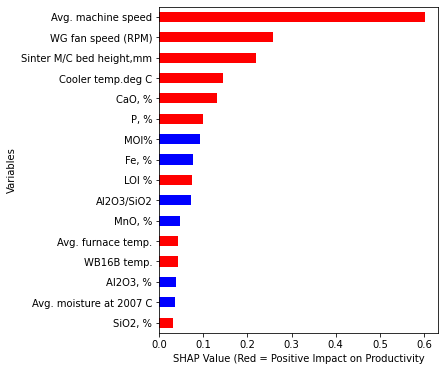

In [27]:
import shap
shap_values = shap.TreeExplainer(model).shap_values(X_train)
def ABS_SHAP(df_shap,df):
    #import matplotlib as plt
    # Make a copy of the input data
    shap_v = pd.DataFrame(df_shap)
    feature_list = df.columns
    shap_v.columns = feature_list
    df_v = df.copy().reset_index().drop('index',axis=1)
    
    # Determine the correlation in order to plot with different colors
    corr_list = list()
    for i in feature_list:
        b = np.corrcoef(shap_v[i],df_v[i])[1][0]
        corr_list.append(b)
    corr_df = pd.concat([pd.Series(feature_list),pd.Series(corr_list)],axis=1).fillna(0)
    # Make a data frame. Column 1 is the feature, and Column 2 is the correlation coefficient
    corr_df.columns  = ['Variables','Corr']
    corr_df['Sign'] = np.where(corr_df['Corr']>0,'red','blue')
    
    # Plot it
    shap_abs = np.abs(shap_v)
    k=pd.DataFrame(shap_abs.mean()).reset_index()
    k.columns = ['Variables','SHAP_abs']
    k2 = k.merge(corr_df,left_on = 'Variables',right_on='Variables',how='inner')
    k2 = k2.sort_values(by='SHAP_abs',ascending = True)
    colorlist = k2['Sign']
    ax = k2.plot.barh(x='Variables',y='SHAP_abs',color = colorlist,figsize=(5,6), legend=False)
    ax.set_xlabel("SHAP Value (Red = Positive Impact on Productivity")
    
ABS_SHAP(shap_values,X_train) 

In [28]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import RidgeCV

from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor

from sklearn.tree import DecisionTreeRegressor
import xgboost as xgb
from xgboost import XGBRegressor

In [29]:
ESTIMATORS = {
    "Extra trees": ExtraTreesRegressor(),
    "K-nn": KNeighborsRegressor(),                          # Accept default parameters
    "Linear regression": LinearRegression(),
    "Ridge": RidgeCV(),
    "Lasso": Lasso(),
    "ElasticNet": ElasticNet(random_state=2),
    "RandomForestRegressor": RandomForestRegressor( random_state=2),
    "Decision Tree Regressor":DecisionTreeRegressor(random_state=2),
    "MultiO/P GBR" :GradientBoostingRegressor(random_state=2),
    "MultiO/P AdaB" :AdaBoostRegressor(random_state=2),
    "xgbr":xgb.XGBRegressor(objective='reg:squarederror',random_state=2)
    
}

In [30]:
y_test_predict = dict()
y_mse = dict()
score=dict()
score_train=dict()

for name,estimator in ESTIMATORS.items():     
    estimator.fit(X_train, y_train)                    # fit() with instantiated object
    y_test_predict[name] = estimator.predict(X_test)   # Make predictions and save it in dict under key: name
    
    score[name]=estimator.score(X_test,y_test)
    score_train[name]=estimator.score(X_train,y_train)

In [31]:
score

{'Extra trees': 0.9155747070255522,
 'K-nn': 0.8500524338038292,
 'Linear regression': 0.8272297393280865,
 'Ridge': 0.831862405137447,
 'Lasso': 0.667739114634029,
 'ElasticNet': 0.671087023224185,
 'RandomForestRegressor': 0.9043077761161341,
 'Decision Tree Regressor': 0.7914001582828027,
 'MultiO/P GBR': 0.9044212052125903,
 'MultiO/P AdaB': 0.8434863012027033,
 'xgbr': 0.8921215982805658}

In [32]:
score_train

{'Extra trees': 1.0,
 'K-nn': 0.8027215368701549,
 'Linear regression': 0.7082065430566769,
 'Ridge': 0.7058610448527048,
 'Lasso': 0.540033056946627,
 'ElasticNet': 0.5409285528727821,
 'RandomForestRegressor': 0.9714609256533123,
 'Decision Tree Regressor': 1.0,
 'MultiO/P GBR': 0.8905573594035264,
 'MultiO/P AdaB': 0.7773572165173829,
 'xgbr': 0.9986310740165297}

In [33]:
import catboost as cb

In [34]:
model_CBR = cb.CatBoostRegressor()
model_CBR.fit(X_train, y_train)


Learning rate set to 0.040721
0:	learn: 1.9915868	total: 701ms	remaining: 11m 40s
1:	learn: 1.9471652	total: 718ms	remaining: 5m 58s
2:	learn: 1.9086397	total: 731ms	remaining: 4m 2s
3:	learn: 1.8666438	total: 749ms	remaining: 3m 6s
4:	learn: 1.8279732	total: 763ms	remaining: 2m 31s
5:	learn: 1.7898416	total: 777ms	remaining: 2m 8s
6:	learn: 1.7578253	total: 790ms	remaining: 1m 52s
7:	learn: 1.7262190	total: 803ms	remaining: 1m 39s
8:	learn: 1.6957078	total: 817ms	remaining: 1m 29s
9:	learn: 1.6643814	total: 830ms	remaining: 1m 22s
10:	learn: 1.6342783	total: 843ms	remaining: 1m 15s
11:	learn: 1.6044110	total: 859ms	remaining: 1m 10s
12:	learn: 1.5802271	total: 873ms	remaining: 1m 6s
13:	learn: 1.5528487	total: 886ms	remaining: 1m 2s
14:	learn: 1.5296762	total: 899ms	remaining: 59.1s
15:	learn: 1.5084784	total: 913ms	remaining: 56.1s
16:	learn: 1.4869730	total: 928ms	remaining: 53.6s
17:	learn: 1.4658962	total: 941ms	remaining: 51.3s
18:	learn: 1.4433492	total: 955ms	remaining: 49.3s
1

162:	learn: 0.7652345	total: 3.42s	remaining: 17.6s
163:	learn: 0.7632056	total: 3.44s	remaining: 17.5s
164:	learn: 0.7625622	total: 3.45s	remaining: 17.5s
165:	learn: 0.7619787	total: 3.47s	remaining: 17.4s
166:	learn: 0.7608882	total: 3.48s	remaining: 17.4s
167:	learn: 0.7597041	total: 3.53s	remaining: 17.5s
168:	learn: 0.7588149	total: 3.55s	remaining: 17.5s
169:	learn: 0.7586187	total: 3.55s	remaining: 17.3s
170:	learn: 0.7577512	total: 3.58s	remaining: 17.4s
171:	learn: 0.7566159	total: 3.6s	remaining: 17.3s
172:	learn: 0.7555769	total: 3.61s	remaining: 17.3s
173:	learn: 0.7541345	total: 3.62s	remaining: 17.2s
174:	learn: 0.7521834	total: 3.64s	remaining: 17.2s
175:	learn: 0.7514106	total: 3.65s	remaining: 17.1s
176:	learn: 0.7500372	total: 3.66s	remaining: 17s
177:	learn: 0.7482798	total: 3.68s	remaining: 17s
178:	learn: 0.7477832	total: 3.69s	remaining: 16.9s
179:	learn: 0.7462917	total: 3.71s	remaining: 16.9s
180:	learn: 0.7443241	total: 3.72s	remaining: 16.8s
181:	learn: 0.743

331:	learn: 0.6089110	total: 6.07s	remaining: 12.2s
332:	learn: 0.6075540	total: 6.08s	remaining: 12.2s
333:	learn: 0.6072146	total: 6.1s	remaining: 12.2s
334:	learn: 0.6063497	total: 6.11s	remaining: 12.1s
335:	learn: 0.6057243	total: 6.13s	remaining: 12.1s
336:	learn: 0.6056834	total: 6.15s	remaining: 12.1s
337:	learn: 0.6056187	total: 6.16s	remaining: 12.1s
338:	learn: 0.6039786	total: 6.17s	remaining: 12s
339:	learn: 0.6030764	total: 6.19s	remaining: 12s
340:	learn: 0.6021260	total: 6.2s	remaining: 12s
341:	learn: 0.6016504	total: 6.27s	remaining: 12.1s
342:	learn: 0.6015993	total: 6.28s	remaining: 12s
343:	learn: 0.6008281	total: 6.3s	remaining: 12s
344:	learn: 0.5998987	total: 6.31s	remaining: 12s
345:	learn: 0.5982776	total: 6.33s	remaining: 12s
346:	learn: 0.5971483	total: 6.34s	remaining: 11.9s
347:	learn: 0.5959439	total: 6.36s	remaining: 11.9s
348:	learn: 0.5946471	total: 6.37s	remaining: 11.9s
349:	learn: 0.5940533	total: 6.38s	remaining: 11.9s
350:	learn: 0.5928660	total: 

492:	learn: 0.4968810	total: 8.86s	remaining: 9.11s
493:	learn: 0.4962878	total: 8.87s	remaining: 9.09s
494:	learn: 0.4961797	total: 8.89s	remaining: 9.07s
495:	learn: 0.4955962	total: 8.91s	remaining: 9.05s
496:	learn: 0.4953355	total: 8.93s	remaining: 9.04s
497:	learn: 0.4948092	total: 8.94s	remaining: 9.01s
498:	learn: 0.4942172	total: 8.97s	remaining: 9s
499:	learn: 0.4941244	total: 8.98s	remaining: 8.98s
500:	learn: 0.4938296	total: 8.99s	remaining: 8.96s
501:	learn: 0.4936055	total: 9.01s	remaining: 8.94s
502:	learn: 0.4930493	total: 9.02s	remaining: 8.92s
503:	learn: 0.4923550	total: 9.04s	remaining: 8.9s
504:	learn: 0.4914496	total: 9.05s	remaining: 8.87s
505:	learn: 0.4905395	total: 9.07s	remaining: 8.85s
506:	learn: 0.4899584	total: 9.08s	remaining: 8.83s
507:	learn: 0.4894596	total: 9.09s	remaining: 8.81s
508:	learn: 0.4889257	total: 9.11s	remaining: 8.79s
509:	learn: 0.4887333	total: 9.13s	remaining: 8.77s
510:	learn: 0.4879299	total: 9.14s	remaining: 8.75s
511:	learn: 0.48

658:	learn: 0.4202564	total: 11.5s	remaining: 5.97s
659:	learn: 0.4197422	total: 11.6s	remaining: 5.95s
660:	learn: 0.4193381	total: 11.6s	remaining: 5.93s
661:	learn: 0.4191026	total: 11.6s	remaining: 5.91s
662:	learn: 0.4188394	total: 11.6s	remaining: 5.89s
663:	learn: 0.4182162	total: 11.6s	remaining: 5.88s
664:	learn: 0.4179168	total: 11.6s	remaining: 5.86s
665:	learn: 0.4174281	total: 11.6s	remaining: 5.84s
666:	learn: 0.4167502	total: 11.7s	remaining: 5.82s
667:	learn: 0.4165971	total: 11.7s	remaining: 5.8s
668:	learn: 0.4158366	total: 11.7s	remaining: 5.78s
669:	learn: 0.4155744	total: 11.7s	remaining: 5.76s
670:	learn: 0.4154575	total: 11.7s	remaining: 5.74s
671:	learn: 0.4152250	total: 11.7s	remaining: 5.72s
672:	learn: 0.4150992	total: 11.7s	remaining: 5.7s
673:	learn: 0.4148639	total: 11.7s	remaining: 5.68s
674:	learn: 0.4143706	total: 11.8s	remaining: 5.66s
675:	learn: 0.4139499	total: 11.8s	remaining: 5.64s
676:	learn: 0.4132610	total: 11.8s	remaining: 5.62s
677:	learn: 0.

822:	learn: 0.3605861	total: 14.1s	remaining: 3.02s
823:	learn: 0.3603373	total: 14.1s	remaining: 3.01s
824:	learn: 0.3600124	total: 14.1s	remaining: 2.99s
825:	learn: 0.3599781	total: 14.1s	remaining: 2.97s
826:	learn: 0.3596698	total: 14.1s	remaining: 2.96s
827:	learn: 0.3594527	total: 14.1s	remaining: 2.94s
828:	learn: 0.3590325	total: 14.2s	remaining: 2.92s
829:	learn: 0.3587026	total: 14.2s	remaining: 2.9s
830:	learn: 0.3583888	total: 14.2s	remaining: 2.88s
831:	learn: 0.3581350	total: 14.2s	remaining: 2.87s
832:	learn: 0.3576965	total: 14.2s	remaining: 2.85s
833:	learn: 0.3573165	total: 14.2s	remaining: 2.83s
834:	learn: 0.3569599	total: 14.2s	remaining: 2.81s
835:	learn: 0.3568167	total: 14.3s	remaining: 2.8s
836:	learn: 0.3562283	total: 14.3s	remaining: 2.78s
837:	learn: 0.3558835	total: 14.3s	remaining: 2.76s
838:	learn: 0.3555135	total: 14.3s	remaining: 2.75s
839:	learn: 0.3551213	total: 14.3s	remaining: 2.73s
840:	learn: 0.3550366	total: 14.3s	remaining: 2.71s
841:	learn: 0.

987:	learn: 0.3102132	total: 16.8s	remaining: 204ms
988:	learn: 0.3100404	total: 16.8s	remaining: 187ms
989:	learn: 0.3099391	total: 16.8s	remaining: 170ms
990:	learn: 0.3096013	total: 16.8s	remaining: 153ms
991:	learn: 0.3093121	total: 16.9s	remaining: 136ms
992:	learn: 0.3090906	total: 16.9s	remaining: 119ms
993:	learn: 0.3089304	total: 16.9s	remaining: 102ms
994:	learn: 0.3085358	total: 16.9s	remaining: 84.9ms
995:	learn: 0.3083263	total: 16.9s	remaining: 68ms
996:	learn: 0.3075757	total: 16.9s	remaining: 51ms
997:	learn: 0.3074533	total: 17s	remaining: 34ms
998:	learn: 0.3069013	total: 17s	remaining: 17ms
999:	learn: 0.3066867	total: 17s	remaining: 0us


In [35]:
y_pred = model_CBR.predict(X_test)

In [36]:
r2_score(y_test,y_pred)

0.9185629761559566

In [37]:
y_pred1 = model_CBR.predict(X_train)
r2_score(y_train,y_pred1)

0.9773277958366875

In [38]:

rf=RandomForestRegressor()
rf.fit(X_train,y_train)

RandomForestRegressor()

In [39]:
rf.score(X_test,y_test)

0.9009194176612259

In [40]:
rf.score(X_train,y_train)

0.970779702541634

In [41]:
xgbr=xgb.XGBRegressor(learning_rate=0.15,objective='reg:squarederror',random_state=2)
xgbr.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.15, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=2, num_parallel_tree=1, random_state=2,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [42]:
xgbr.score(X_test,y_test)

0.9028362037976023

In [43]:
xgbr.score(X_train,y_train)

0.9855676156463755

In [44]:
y_et=model.predict(X_test)
y_et=pd.DataFrame(y_et)
y_cat=model_CBR.predict(X_test)
y_cat=pd.DataFrame(y_cat)
y_rf=rf.predict(X_test)
y_rf=pd.DataFrame(y_rf)


In [45]:
from scipy import stats
from scipy.stats import linregress
linregress(y_test.iloc[:,0],y_et.iloc[:,0])

LinregressResult(slope=0.8842371410662152, intercept=4.270084434592285, rvalue=0.9580828081430608, pvalue=2.4349404734186282e-77, stderr=0.022426934923524416, intercept_stderr=0.8235309081399039)

Text(0.5, 1.0, 'Testing Data: ETR model')

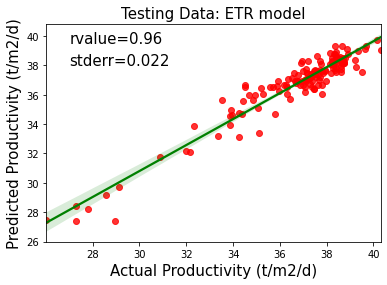

In [46]:
fig,ax=plt.subplots()
YS=sns.regplot(y_test.iloc[:,0],y_et.iloc[:,0],scatter_kws={"color": "red"}, line_kws={"color": "Green"})
YS.set_xlabel("Actual Productivity (t/m2/d)", fontsize = 15)
YS.set_ylabel("Predicted Productivity (t/m2/d)", fontsize = 15)
ax.text(27,39.5, "rvalue=0.96", fontsize=15)
ax.text(27,38, "stderr=0.022", fontsize=15)
#plt.legend(labels=['y=0.91079*x + 38.6608'],fontsize = 10)
plt.title('Testing Data: ETR model',fontsize=15)

In [47]:
linregress(y_test.iloc[:,0],y_rf.iloc[:,0])

LinregressResult(slope=0.8689611765290197, intercept=4.822370405786433, rvalue=0.9498533372338774, pvalue=4.716486606343809e-72, stderr=0.02426377731986324, intercept_stderr=0.8909808959302581)

Text(0.5, 1.0, 'Testing Data: RF model')

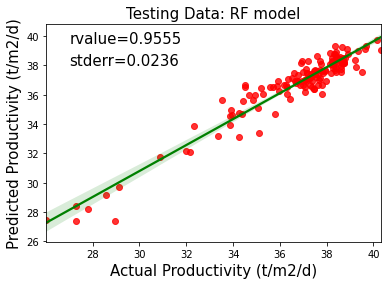

In [48]:
fig,ax=plt.subplots()
YS=sns.regplot(y_test.iloc[:,0],y_et.iloc[:,0],scatter_kws={"color": "red"}, line_kws={"color": "Green"})
YS.set_xlabel("Actual Productivity (t/m2/d)", fontsize = 15)
YS.set_ylabel("Predicted Productivity (t/m2/d)", fontsize = 15)
ax.text(27,39.5, "rvalue=0.9555", fontsize=15)
ax.text(27,38, "stderr=0.0236", fontsize=15)
#plt.legend(labels=['y=0.91079*x + 38.6608'],fontsize = 10)
plt.title('Testing Data: RF model',fontsize=15)

In [49]:
linregress(y_test.iloc[:,0],y_cat.iloc[:,0])

LinregressResult(slope=0.8824152952215807, intercept=4.332127418821429, rvalue=0.9592750925686667, pvalue=3.414684579082055e-78, stderr=0.022039423012702404, intercept_stderr=0.8093012313284046)

Text(0.5, 1.0, 'Testing Data: CBR model')

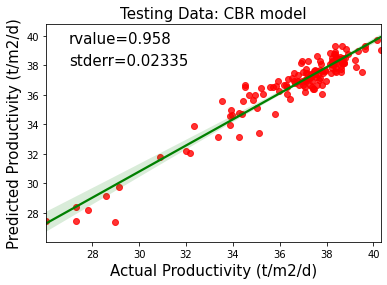

In [50]:
fig,ax=plt.subplots()
YS=sns.regplot(y_test.iloc[:,0],y_et.iloc[:,0],scatter_kws={"color": "red"}, line_kws={"color": "Green"})
YS.set_xlabel("Actual Productivity (t/m2/d)", fontsize = 15)
YS.set_ylabel("Predicted Productivity (t/m2/d)", fontsize = 15)
ax.text(27,39.5, "rvalue=0.958", fontsize=15)
ax.text(27,38, "stderr=0.02335", fontsize=15)
#plt.legend(labels=['y=0.91079*x + 38.6608'],fontsize = 10)
plt.title('Testing Data: CBR model',fontsize=15)

In [51]:
X_train.columns

Index(['Fe, %', 'SiO2, %', 'Al2O3, %', 'CaO, %', 'MnO, %', 'P, %',
       'Al2O3/SiO2', 'LOI %', 'MOI%', 'Avg. machine speed',
       'Avg. furnace temp.', 'WG fan speed (RPM)', 'Avg. moisture at 2007 C',
       'Sinter M/C bed height,mm', 'WB16B temp.', 'Cooler temp.deg C'],
      dtype='object')

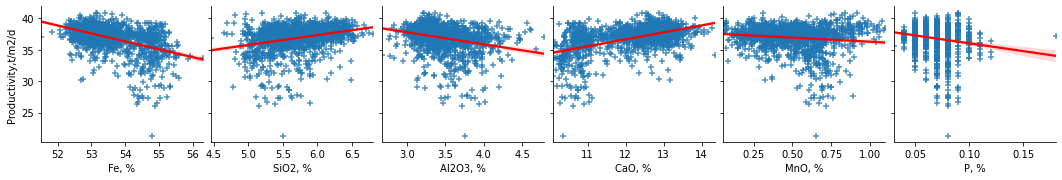

In [52]:
sns.pairplot(df,x_vars=['Fe, %', 'SiO2, %', 'Al2O3, %', 'CaO, %', 'MnO, %', 'P, %'],
            y_vars=['Productivity,t/m2/d'],kind='reg',plot_kws={'line_kws':{'color':'red'}}, markers='+')


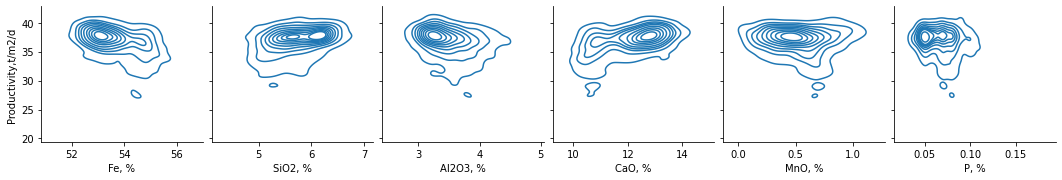

In [53]:
sns.pairplot(df,x_vars=['Fe, %', 'SiO2, %', 'Al2O3, %', 'CaO, %', 'MnO, %', 'P, %'],
            y_vars=['Productivity,t/m2/d'],kind='kde')


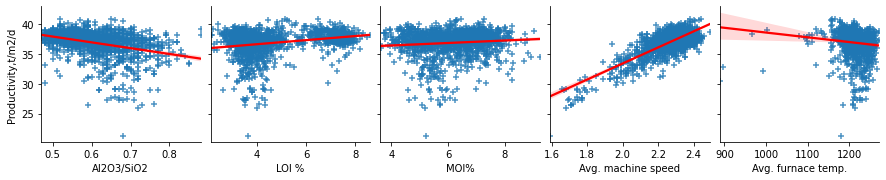

In [54]:
sns.pairplot(df,x_vars=['Al2O3/SiO2', 'LOI %', 'MOI%', 'Avg. machine speed',
       'Avg. furnace temp.' ],
            y_vars=['Productivity,t/m2/d'],kind='reg',plot_kws={'line_kws':{'color':'red'}}, markers='+')

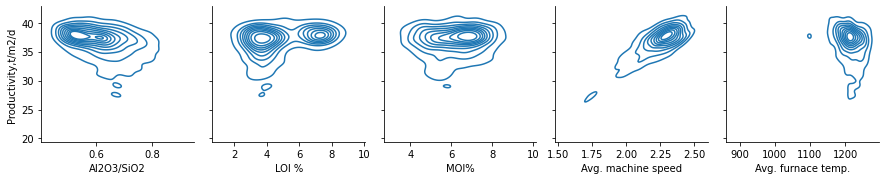

In [55]:
sns.pairplot(df,x_vars=['Al2O3/SiO2', 'LOI %', 'MOI%', 'Avg. machine speed',
       'Avg. furnace temp.' ],
            y_vars=['Productivity,t/m2/d'],kind='kde')

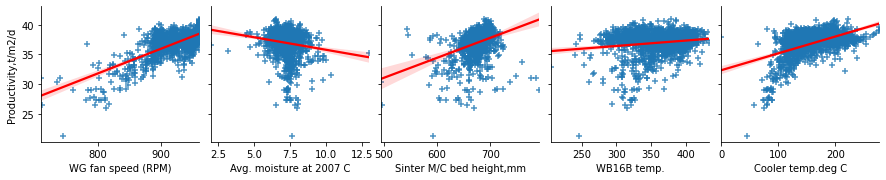

In [56]:
sns.pairplot(df,x_vars=['WG fan speed (RPM)','Avg. moisture at 2007 C',
       'Sinter M/C bed height,mm', 'WB16B temp.', 'Cooler temp.deg C'],
            y_vars=['Productivity,t/m2/d'],kind='reg',plot_kws={'line_kws':{'color':'red'}}, markers='+')

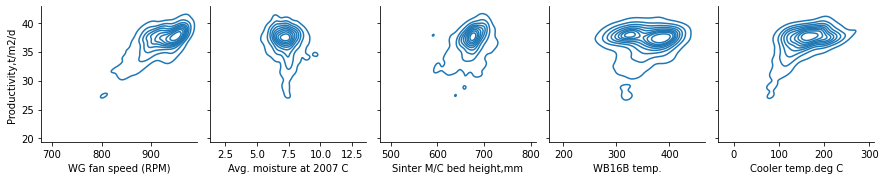

In [57]:
sns.pairplot(df,x_vars=['WG fan speed (RPM)','Avg. moisture at 2007 C',
       'Sinter M/C bed height,mm', 'WB16B temp.', 'Cooler temp.deg C'],
            y_vars=['Productivity,t/m2/d'],kind='kde')

In [58]:
shap_values = shap.TreeExplainer(model).shap_values(X_train)

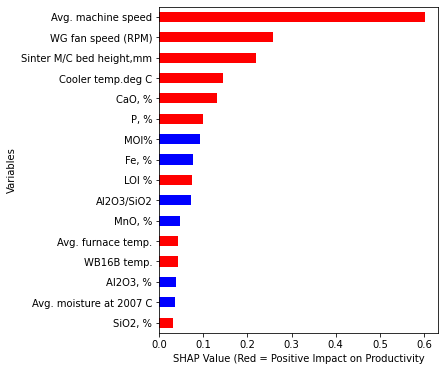

In [59]:
ABS_SHAP(shap_values,X_train) 

# Validation

In [60]:
prod=pd.read_csv("D:/JSW/validation/TI_prod_val.csv")


In [61]:
y_train.columns

Index(['Productivity,t/m2/d'], dtype='object')

In [62]:
xval=prod[['Fe, %', 'SiO2, %', 'Al2O3, %', 'CaO, %', 'MnO, %', 'P, %',
       'Al2O3/SiO2', 'LOI %', 'MOI%', 'Avg. machine speed',
       'Avg. furnace temp.', 'WG fan speed (RPM)', 'Avg. moisture at 2007 C',
       'Sinter M/C bed height,mm', 'WB16B temp.', 'Cooler temp.deg C']]
yval=prod[['Productivity,t/m2/d']]

In [64]:
ym=model.predict(xval)

In [65]:
ym=pd.DataFrame(ym)

Text(0.5, 1.0, 'Data outside Database: ETR model')

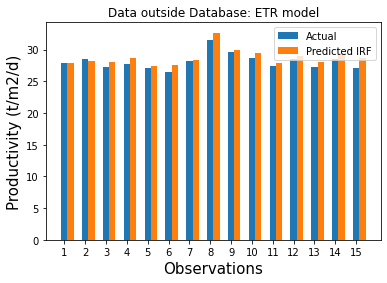

In [66]:
measured=yval.iloc[:,0]
predicted=ym.iloc[:,0]
x=[y for y in range(1,16,1)]
w=0.3

bar1=np.arange(len(x))
bar2=[i+w for i in bar1]
plt.bar(bar1,measured,w,label='Actual')
plt.bar(bar2,predicted,w,label='Predicted IRF')
plt.legend(loc='upper right')
plt.xticks(bar1,x)
plt.xlabel('Observations',fontsize=15)
plt.ylabel('Productivity (t/m2/d)',fontsize=15)
plt.title('Data outside Database: ETR model')

In [67]:
mape_mean =np.mean(np.abs((yval.iloc[:,0] - ym.iloc[:,0])/yval.iloc[:,0]))*100
mape_mean

2.508643408512953

In [68]:
mape=np.abs((yval.iloc[:,0] - ym.iloc[:,0])/yval.iloc[:,0])*100
mape

0     0.021575
1     1.218476
2     2.506960
3     3.115398
4     1.560074
5     4.247450
6     0.966240
7     3.737294
8     1.453961
9     2.891948
10    1.983942
11    2.024947
12    2.954479
13    3.520914
14    5.425994
dtype: float64

In [69]:
mape=pd.DataFrame(mape)

Text(0.5, 1.0, 'Validation Data: ETR Model')

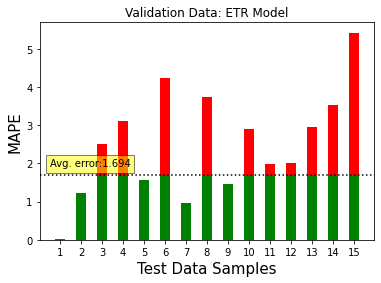

In [70]:
mape_ys=mape.iloc[:,0]

x=[y for y in range(1,16,1)]
w=0.5
threshold=1.694
bar1=np.arange(len(x))
a_threshold = np.maximum(mape_ys - threshold, 0)
b_threshold = np.minimum(mape_ys, threshold)

fig, ax = plt.subplots()
ax.bar(x, b_threshold, w, color="green")
ax.bar(x, a_threshold, w, color="red", bottom=b_threshold)

plt.axhline(threshold, color='black', ls='dotted')

ax.text(0.5, 1.917492, "Avg. error:1.694", bbox=dict(facecolor='yellow', alpha=0.5))
plt.xticks(x)
plt.xlabel('Test Data Samples',fontsize=15)
plt.ylabel('MAPE',fontsize=15)
plt.title('Validation Data: ETR Model')

In [71]:
yrf=rf.predict(xval)
mean_squared_error(yval,yrf,squared=False)

0.9533181235383504

In [72]:
y_xgbr=xgbr.predict(xval)
mean_squared_error(yval,y_xgbr,squared=False)

1.4739808451983367

In [73]:
y_cbr=model_CBR.predict(xval)
mean_squared_error(yval,y_cbr)

1.7601408396449798

In [74]:
mean_squared_error(yval,ym,squared=False)

0.7982777770509106